In [1]:
# Base libs and modules import

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [3]:
# Distribution of the dataset into training and test samples

In [4]:
(x_train, label_train), (x_test, label_test) = fashion_mnist.load_data()

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
label_train.shape

(60000,)

In [7]:
# Normalizatoin dataset

In [8]:
x_train = x_train/255
x_test = x_test/255

In [9]:
# Intro train dataset

In [10]:
label_name = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

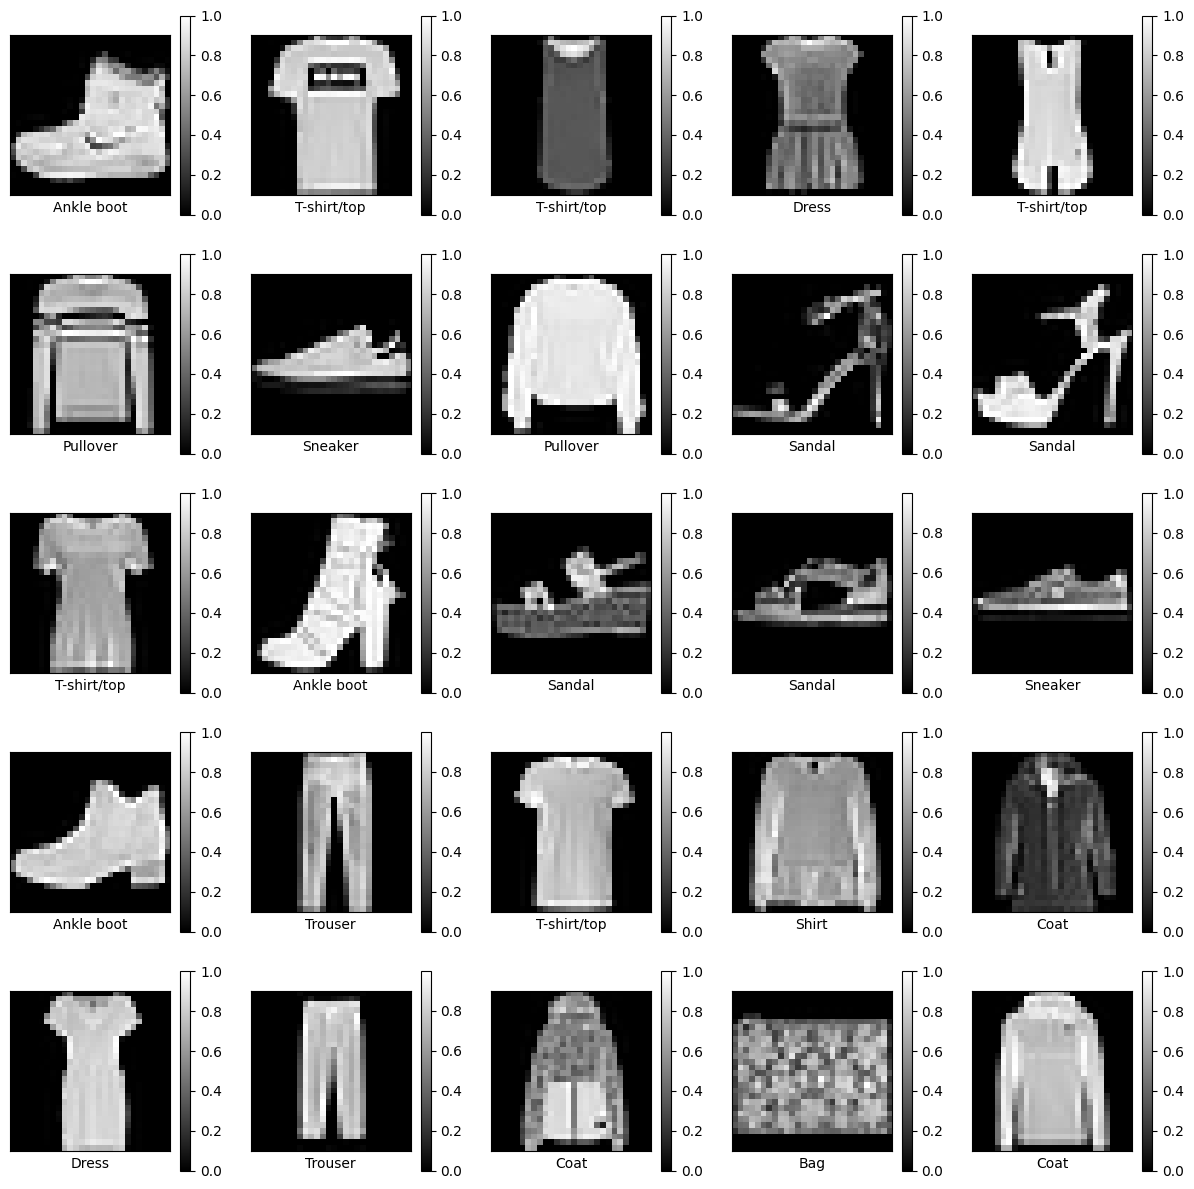

In [11]:
plt.figure(figsize=(15, 15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i], cmap=plt.cm.binary_r)
    plt.xticks([])
    plt.yticks([])
    plt.colorbar()
    plt.xlabel(label_name[label_train[i]])

In [12]:
# Create neural network model

In [59]:
model = keras.Sequential([
            keras.layers.Flatten(input_shape=(28, 28)),
            keras.layers.Dense(256, activation='relu'),
            keras.layers.Dense(120, activation='relu'),
            keras.layers.Dense(10, activation='softmax')   
            ])

In [60]:
# Compile model NN

In [65]:
model.compile(
    optimizer=keras.optimizers.SGD(learning_rate=0.1),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [66]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_17 (Dense)             (None, 120)               30840     
_________________________________________________________________
dense_18 (Dense)             (None, 10)                1210      
Total params: 233,010
Trainable params: 233,010
Non-trainable params: 0
_________________________________________________________________


In [67]:
# Learning model NN

In [68]:
x_val = x_train[:3000]
x_train = x_train[3000:]

label_val = label_train[:3000]
label_train = label_train[3000:]

history = model.fit(
    x=x_train,
    y=label_train,
    epochs=15,
    batch_size=512,
    validation_data=(x_val, label_val)
)

Epoch 1/15
53/53 [==============================] - 0s 8ms/step - loss: 0.9358 - accuracy: 0.6938 - val_loss: 0.7530 - val_accuracy: 0.7417
Epoch 2/15
53/53 [==============================] - 0s 3ms/step - loss: 0.6855 - accuracy: 0.7596 - val_loss: 0.6126 - val_accuracy: 0.7717
Epoch 3/15
53/53 [==============================] - 0s 3ms/step - loss: 0.6034 - accuracy: 0.7899 - val_loss: 0.5585 - val_accuracy: 0.7973
Epoch 4/15
53/53 [==============================] - 0s 3ms/step - loss: 0.5545 - accuracy: 0.8080 - val_loss: 0.5021 - val_accuracy: 0.8250
Epoch 5/15
53/53 [==============================] - 0s 3ms/step - loss: 0.5249 - accuracy: 0.8159 - val_loss: 0.5190 - val_accuracy: 0.8037
Epoch 6/15
53/53 [==============================] - 0s 3ms/step - loss: 0.5075 - accuracy: 0.8225 - val_loss: 0.4558 - val_accuracy: 0.8380
Epoch 7/15
53/53 [==============================] - 0s 3ms/step - loss: 0.4816 - accuracy: 0.8288 - val_loss: 0.4452 - val_accuracy: 0.8470
Epoch 8/15
53/53 [==

In [38]:
results = model.evaluate(x_test, label_test)
print(results)

313/313 [==============================] - 1s 2ms/step - loss: 0.3591 - accuracy: 0.8726
[0.3590984642505646, 0.8726000189781189]
